In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

/home/branch/rnd/research/hifi-gan


In [14]:
import os
import json
from glob import glob

from env import AttrDict

import matplotlib.pyplot as plt


from torch.utils.data import DataLoader

from meldataset import MelDataset, get_dataset_filelist

In [6]:
# Load config
config_file = "./config_v1.json"
with open(config_file) as f:
    data = f.read()

global h
json_config = json.loads(data)
h = AttrDict(json_config)

In [ ]:
training_filelist, validation_filelist = get_dataset_filelist(a)

In [9]:
training_filelist = glob("/home/branch/rnd/datasets/esd-0011/angry/*.wav")

In [12]:
trainset = MelDataset(training_filelist, h.segment_size, h.n_fft, h.num_mels,
    h.hop_size, h.win_size, h.sampling_rate, h.fmin, h.fmax, n_cache_reuse=0,
    shuffle=False if h.num_gpus > 1 else True, fmax_loss=h.fmax_for_loss, device="cpu",
    fine_tuning=False, base_mels_path=None,
)

train_loader = DataLoader(trainset, num_workers=h.num_workers, shuffle=False,
                            sampler=None,
                            batch_size=4,
                            pin_memory=True,
                            drop_last=True)

In [13]:
x, y, _, y_mel = next(iter(train_loader))

/home/branch/rnd/research/hifi-gan/meldataset.py:57: FutureWarning: Pass sr=22050, n_fft=1024, n_mels=80, fmin=0, fmax=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = librosa_mel_fn(sampling_rate, n_fft, num_mels, fmin, fmax)
/home/branch/miniconda3/envs/vus/lib/python3.8/site-packages/torch/functional.py:632: UserWarning: stft will soon require the return_complex parameter be given for real inputs, and will further require that return_complex=True in a future PyTorch release. (Triggered internally at ../aten/src/ATen/native/SpectralOps.cpp:801.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore[attr-defined]
/home/branch/rnd/research/hifi-gan/meldataset.py:57: FutureWarning: Pass sr=22050, n_fft=1024, n_mels=80, fmin=0, fmax=None as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = librosa_mel_fn(sampling_rate, n_fft, num_mels, fmin, fmax)
/ho

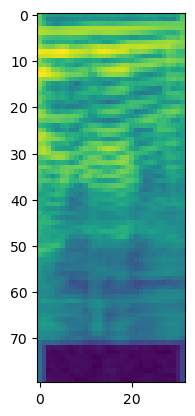

In [15]:
plt.imshow(y_mel[0])
plt.show()